# Lecture 6

## Dimensionality reduction

Loading 20 News Groups:

In [37]:
from sklearn.datasets import fetch_20newsgroups


cats = ['sci.space', 'talk.politics.guns', 'comp.graphics', 'rec.autos', 'alt.atheism']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, remove=('headers', 'footers', 'quotes'), shuffle = True)
data = newsgroups_train.data

Vectorizing the data using Tf-idf:

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vect = TfidfVectorizer(min_df =5, stop_words = 'english')
X = vect.fit_transform(data)
X.shape

(2797, 6497)

Running LSA with 50 components:

In [39]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(50)
Z = lsa.fit_transform(X)
Z.shape

(2797, 50)

We can access to the components:

In [40]:
print(lsa.components_.shape)
lsa.components_

(50, 6497)


array([[  1.70424740e-02,   3.68416497e-02,   5.88746015e-03, ...,
          6.00745781e-03,   8.83081109e-03,   1.57385146e-03],
       [  1.78931455e-02,  -1.14109722e-02,   8.62461785e-03, ...,
          1.22261628e-03,   2.23260510e-02,   1.23685224e-03],
       [  7.10923581e-03,   2.55242224e-02,   9.58513922e-03, ...,
          7.89740789e-03,  -1.35314386e-02,   3.00327324e-03],
       ..., 
       [  4.90382126e-03,  -1.12523807e-01,  -2.64831235e-03, ...,
          3.36227898e-03,  -7.57908171e-03,   1.50146957e-03],
       [ -3.15963592e-02,   5.36819873e-02,   2.21687567e-03, ...,
          2.40858846e-03,   2.98882426e-02,   1.03254912e-05],
       [  9.59267102e-03,  -5.69315144e-02,   1.12336461e-03, ...,
         -8.98011193e-03,  -1.90440770e-02,   1.76812428e-04]])

Let's print top features per component. It is better to use absolute value of components:

In [41]:
vocab = np.array(vect.get_feature_names())

for i in range(Z.shape[1]):
    order = np.abs(lsa.components_[i]).argsort()[::-1]
    print(vocab[order[:8]])

['don' 'people' 'just' 'like' 'think' 'know' 'car' 'space']
['thanks' 'space' 'graphics' 'people' 'files' 'image' 'gun' 'program']
['space' 'nasa' 'thanks' 'car' 'graphics' 'launch' 'shuttle' 'know']
['car' 'god' 'cars' 'engine' 'dealer' 'people' 'atheism' 'new']
['god' 'gun' 'guns' 'car' 'atheism' 'crime' 'space' 'weapons']
['com' 'ico' 'tek' 'bobbe' 'bronx' 'sank' 'manhattan' 'queens']
['just' 'god' 'car' 'don' 'think' 'gun' 'does' 'graphics']
['thanks' 'image' 'know' 'space' 'graphics' 'advance' 'file' 'mail']
['graphics' 'edu' 'does' 'know' 'files' 'gun' 'fbi' 'space']
['graphics' 'gun' 'fbi' 'files' 'file' 'batf' 'koresh' 'just']
['edu' 'file' 'files' 'car' 'nasa' 'space' 'don' 'people']
['people' 'just' 'gun' 'right' 'fbi' 'know' 'militia' 'car']
['just' 'don' 'think' 'right' 'god' 'militia' 'does' 'post']
['thanks' 'card' 'space' 'vesa' 'mode' 'just' 'windows' 'vga']
['edu' 'space' 'graphics' 'software' 'car' 'group' 'does' 'file']
['know' 'does' 'graphics' 'thanks' 'stuff' 've'

Lets look at at low dimension:

In [42]:
Z

array([[ 0.14439157, -0.03567943, -0.02645414, ..., -0.03340869,
        -0.15048027, -0.03118509],
       [ 0.07646212, -0.04214429,  0.00339063, ...,  0.00124478,
        -0.00762616,  0.09471019],
       [ 0.07530036,  0.00210223,  0.0041075 , ..., -0.01035235,
         0.06486591,  0.03097248],
       ..., 
       [ 0.15335204, -0.02796571, -0.01678292, ..., -0.05112683,
        -0.00613636,  0.02303423],
       [ 0.03133516, -0.03550246, -0.00139435, ..., -0.01392307,
        -0.03316602,  0.00365622],
       [ 0.11015607, -0.03062622, -0.0442725 , ..., -0.02481805,
         0.03812779, -0.04729474]])

Verifying this formula: Z = X W^T

In [43]:
X.dot(lsa.components_.T)

array([[ 0.14439157, -0.03567943, -0.02645414, ..., -0.03340869,
        -0.15048027, -0.03118509],
       [ 0.07646212, -0.04214429,  0.00339063, ...,  0.00124478,
        -0.00762616,  0.09471019],
       [ 0.07530036,  0.00210223,  0.0041075 , ..., -0.01035235,
         0.06486591,  0.03097248],
       ..., 
       [ 0.15335204, -0.02796571, -0.01678292, ..., -0.05112683,
        -0.00613636,  0.02303423],
       [ 0.03133516, -0.03550246, -0.00139435, ..., -0.01392307,
        -0.03316602,  0.00365622],
       [ 0.11015607, -0.03062622, -0.0442725 , ..., -0.02481805,
         0.03812779, -0.04729474]])

## Using PCA:

In [44]:
from sklearn.decomposition import PCA

pca = PCA(50)
Z = pca.fit_transform(X)
Z.shape

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

PCA does not support sparse matrix, let's change it to the dense matrix:

In [45]:
Z = pca.fit_transform(X.todense())
Z.shape

(2797, 50)

Printing components:

In [46]:
print(pca.components_.shape)
pca.components_

(50, 6497)


array([[ 0.01411352, -0.02325036,  0.00696086, ..., -0.00053702,
         0.01868202,  0.00039853],
       [ 0.00906577,  0.03182982,  0.01047306, ...,  0.00854988,
        -0.00645688,  0.00355222],
       [ 0.02347454,  0.03457953,  0.00064175, ...,  0.00220307,
        -0.01305538, -0.00183001],
       ..., 
       [ 0.00874044,  0.008737  , -0.00515303, ..., -0.00045843,
        -0.01062298, -0.00019544],
       [-0.00214894,  0.00020388,  0.00966423, ..., -0.00229579,
        -0.01568812,  0.00205976],
       [ 0.01459211, -0.11167875,  0.00848524, ...,  0.0016663 ,
        -0.00259742, -0.00015964]])

Prining top features per components:

In [47]:
for i in range(Z.shape[1]):
    order = np.abs(pca.components_[i]).argsort()[::-1]
    print(vocab[order[:8]])

['people' 'thanks' 'gun' 'don' 'graphics' 'think' 'files' 'god']
['space' 'nasa' 'car' 'thanks' 'shuttle' 'launch' 'moon' 'earth']
['car' 'god' 'cars' 'people' 'engine' 'dealer' 'atheism' 'graphics']
['gun' 'god' 'guns' 'graphics' 'people' 'don' 'thanks' 'file']
['god' 'car' 'just' 'don' 'gun' 'know' 'like' 'think']
['com' 'ico' 'tek' 'bobbe' 'bronx' 'queens' 'manhattan' 'beauchaine']
['just' 'god' 'car' 'gun' 'think' 'don' 'does' 'atheism']
['thanks' 'know' 'image' 'space' 'advance' 'graphics' 'does' 'mail']
['graphics' 'edu' 'does' 'files' 'know' 'file' 'comp' 'group']
['gun' 'people' 'fbi' 'file' 'files' 'car' 'graphics' 'batf']
['edu' 'just' 'file' 'files' 'gun' 'software' 'space' 'graphics']
['fbi' 'people' 'right' 'koresh' 'god' 'know' 'batf' 'gas']
['just' 'don' 'think' 'right' 'god' 'militia' 've' 'post']
['thanks' 'card' 'vesa' 'mode' 'space' 'driver' 'just' 'vga']
['know' 'does' 'space' 'software' 'stuff' 'post' 'don' 'deleted']
['graphics' 'edu' 'space' 'software' 'does' 'pe

## Clustering using k-means

In [48]:
from sklearn.cluster import KMeans


Training the clustering algorithm with 5 clusters:

In [49]:
kmeans = KMeans(5)
clusters = kmeans.fit_predict(X)
clusters

array([0, 2, 2, ..., 0, 2, 1])

Cluster distibution:

In [50]:
np.bincount(clusters)

array([ 292,  599, 1253,  432,  221], dtype=int64)

Plotting the histogram:

(array([  292.,     0.,   599.,     0.,     0.,  1253.,     0.,   432.,
            0.,   221.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

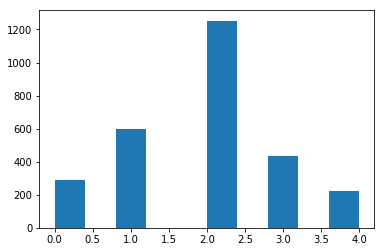

In [51]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(clusters)

Printing the inertia:

In [53]:
kmeans.inertia_

2631.788155328298

Printing centeriods:

In [52]:
print(kmeans.cluster_centers_.shape)
kmeans.cluster_centers_

(5, 6497)


array([[  4.75515542e-03,   7.77549031e-03,   0.00000000e+00, ...,
          4.85010850e-04,   8.34292893e-04,   0.00000000e+00],
       [  5.06317341e-04,   7.20141601e-03,   4.41471219e-04, ...,
          5.78896286e-04,   6.56702646e-04,   1.91103142e-04],
       [  1.89150068e-03,   2.25883102e-03,   7.69207926e-04, ...,
          8.79420229e-04,   1.60215742e-04,   1.11483547e-04],
       [  2.99227337e-03,   7.50922423e-04,   1.49212353e-03, ...,
          2.10106958e-04,   5.50069516e-03,   8.74761822e-06],
       [  6.11171348e-03,   6.59205999e-03,   2.47722752e-03, ...,
          2.16487238e-03,   0.00000000e+00,   5.86199421e-04]])

### Finding best number of clusters with elbow method:

Finding inertia for different number of clusters:

In [54]:
inertia = []

vect = TfidfVectorizer(min_df = 20, stop_words = 'english')
X = vect.fit_transform(data)
print(X.shape)

for i in range(2, 15):
    kmeans = KMeans(i)
    kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    
print(inertia)

(2797, 1769)
[2620.1028645789, 2606.8109365431033, 2594.564915465344, 2582.3768544976547, 2571.986292445937, 2566.939479622204, 2557.417362207412, 2552.089789368247, 2544.335955056231, 2537.7724722152775, 2537.560456979149, 2531.218466952859, 2524.3609271695536]


Plotting the result:

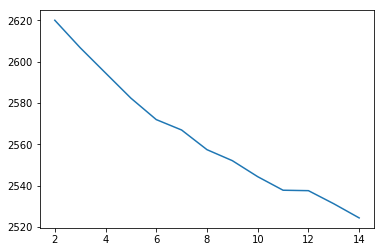

In [56]:
%matplotlib inline

plt.plot(range(2, 15), inertia)

## Clustering in low dimension:

In [57]:
vect = TfidfVectorizer(min_df = 3, stop_words = 'english')
X = vect.fit_transform(data)

lsa = TruncatedSVD(100)
Z = lsa.fit_transform(X)

kmeans = KMeans(5)
clusters = kmeans.fit_predict(Z)

np.bincount(clusters)

array([ 569,  282, 1522,   17,  407], dtype=int64)

(array([  569.,     0.,   282.,     0.,     0.,  1522.,     0.,    17.,
            0.,   407.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

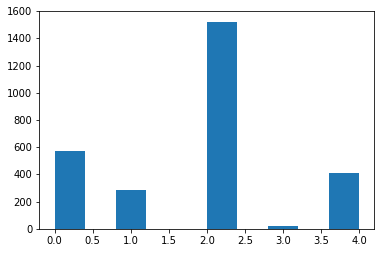

In [58]:
%matplotlib inline

plt.hist(clusters)

Clustering with different number of clusters:

In [63]:
inertia = []
for i in range(2, 30):
    kmeans = KMeans(i, n_jobs = 4)
    kmeans.fit_predict(Z)
    inertia.append(kmeans.inertia_)
    
print(inertia)

[439.90939784131956, 431.56489733070504, 423.94511269697699, 416.25795923043768, 412.49405236330085, 403.15467823025261, 401.8154881803863, 393.69107526598299, 389.7305975216334, 387.1851893168519, 382.96296306197161, 380.18745117821493, 377.45868205694507, 373.23450266174831, 371.90375411278376, 366.34766003173371, 365.14872193277466, 362.22465213508485, 359.17016353828461, 353.94201772613104, 351.60106952441936, 348.50951151456292, 346.81777990142007, 344.94294531429574, 341.56591644532062, 337.62333600049004, 336.4191877438837, 333.38336862308341]


Creating a plot and estimating best number of clusters

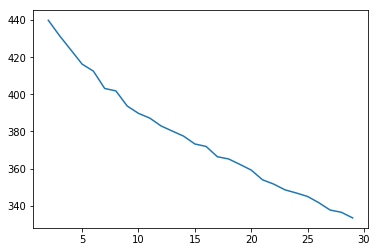

In [64]:
%matplotlib inline

plt.plot(range(2, 30), inertia)